In [6]:
# Cell 1: Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from collections import Counter
import string

nltk.download('stopwords')
stop_words_list = set(stopwords.words('english'))

sns.set(style="whitegrid")



[nltk_data] Downloading package stopwords to C:\Users\nihal
[nltk_data]     akndo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# Cell 2: Load datasets
true_df = pd.read_csv("../data/True.csv")
fake_df = pd.read_csv("../data/Fake.csv")

true_df["label"] = 1  # Real
fake_df["label"] = 0  # Fake

print("Real news:", true_df.shape)
print("Fake news:", fake_df.shape)


Real news: (21417, 5)
Fake news: (23481, 5)


In [3]:
# Cell 3: Combine datasets
df = pd.concat([true_df, fake_df], axis=0).sample(frac=1).reset_index(drop=True)
df = df[["text", "label"]]
df.dropna(inplace=True)
df.head()


,text,label
0,Saturday Night Live returned with a stellar co...,0
1,The Senate Judiciary Committee just gave forme...,0
2,It s certainly not a stretch to say that this ...,0
3,(Reuters) - Donald Trump is “well aware” of wh...,1
4,WASHINGTON (Reuters) - U.S. Democratic preside...,1


In [ ]:
# Cell 4: Class balance
sns.countplot(data=df, x="label")
plt.xticks([0, 1], ["Fake", "Real"])
plt.title("Class Distribution")
plt.show()


In [ ]:
# Cell 5: Function to clean text
def clean_text(text):
    # Lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans("", "", string.punctuation))
    # Tokenize and remove stopwords
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]
    return " ".join(tokens)

df["clean_text"] = df["text"].apply(clean_text)
df.head()


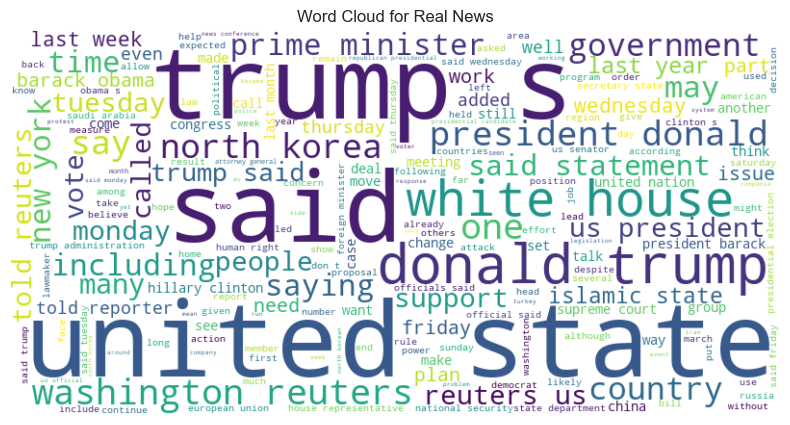

In [ ]:
# Cell 6: WordCloud for Real News
real_text = " ".join(df[df.label == 1]["clean_text"])
wordcloud_real = WordCloud(width=800, height=400, background_color="white").generate(real_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_real, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud for Real News")
plt.show()


In [ ]:
# Cell 7: WordCloud for Fake News
fake_text = " ".join(df[df.label == 0]["clean_text"])
wordcloud_fake = WordCloud(width=800, height=400, background_color="white").generate(fake_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_fake, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud for Fake News")
plt.show()


In [ ]:
# Cell 8: Most Common Words per class
def get_top_words(text, n=20):
    tokens = text.split()
    counter = Counter(tokens)
    return counter.most_common(n)

print("Top 20 Real News Words:")
print(get_top_words(real_text))

print("\nTop 20 Fake News Words:")
print(get_top_words(fake_text))


In [ ]:
# Cell 9: (Optional) Save cleaned CSV
df.to_csv("../data/cleaned_news.csv", index=False)
print("Cleaned dataset saved!")
